<h2>
<B><CENTER>MARKETING ANALYTICS</CENTER></B> </h2>

Create a program to implement ANN, SVM and Logistic regression for binary classification. Find out the inference related to following:
1. Time complexity
2. Generalizing capacity of each technique
3. Hyper parameter tuning and
4. Advantages and disadvantages of each technique

#<B>IMPORTING THE PACKAGE</B>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  scipy import stats
from sklearn.preprocessing import LabelEncoder
plt.rc('figure',figsize=(20,10))
import plotly.express as ex

#Splitting the data
from sklearn.model_selection import train_test_split

#Package for evaluating the model
from sklearn.metrics import classification_report,confusion_matrix

#<b>LOADING THE DATA </b>

In [ ]:
data= pd.read_csv('/content/pseudo_facebook.csv')
data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(99003, 15)

<b> There are 15 attributed with 99,003 records

#<b>DATA PREPROCESSING</b>

In [ ]:
data.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

<b>We have the 175 null values in the gender column and 2 null values in the tenure column. We have 99003 records with 15 attributes. So, by droping the 177 null values will not effect the pattern. So, I am dropping the null values in the present data set. </b>

In [ ]:
data=data.dropna()
data.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

<b>After dropping the values there are no null values. </b>

In [ ]:
data.shape

(98826, 15)

<b>Therefore, we will be working with 98,826 records</b>

In [ ]:
#Checking the number of categorical variables in the data
categorical=[col for col in data.columns if data[col].dtype=='object']
for i,j in enumerate(categorical):
    print("{0}: {1} has the unique elements:{2}".format(i+1,j,data[j].unique()))

1: gender has the unique elements:['male' 'female']


<b>Only Gender is categorical in the given data

#<b>EDA ON TARGET VARIABLE</b>

In [ ]:
#Our target variable count
data['gender'].value_counts()

male      58574
female    40252
Name: gender, dtype: int64

<b>In the given data 558,574 are males and 40,252 are females.</b>

In [ ]:
ex.pie(data,names='gender',title='Gender Division propotion in the data')

<b>In the given data 40.7% are female ration and 59.3% are male</b>

In [ ]:
#Label Encoding
label_enc = LabelEncoder()
#data['gender'] = data['gender'].apply(lambda col: label_enc.fit_transform(col))

data['gender']= label_enc.fit_transform(data['gender']) 


In [ ]:
#Our target variable count
data['gender'].value_counts()

1    58574
0    40252
Name: gender, dtype: int64

<b>
1--> Male<br>
0--> Female
</b>

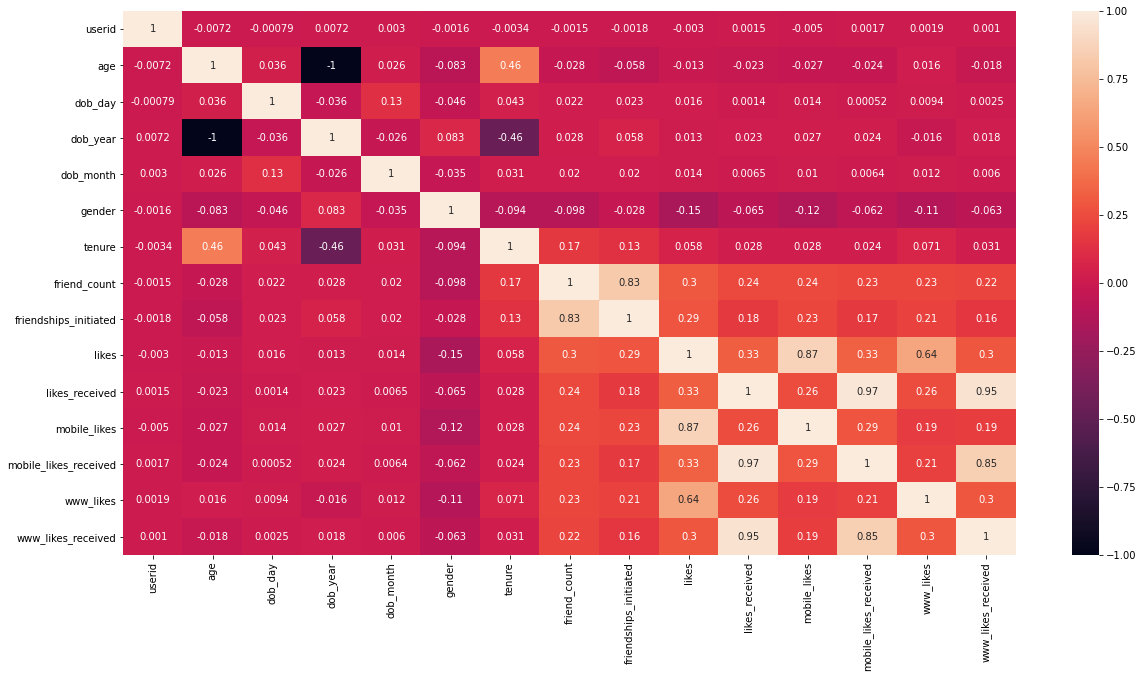

In [ ]:
sns.heatmap(data.corr('pearson'),annot=True)

<b>The gender have preferably good correlation with the www_likes, mobile_likes,likes,friend_count,tenure

In [ ]:
df=data[['www_likes','mobile_likes','likes','friend_count','tenure','gender']]
df.tail()

,www_likes,mobile_likes,likes,friend_count,tenure,gender
98998,491,3505,3996,2118,541.0,0
98999,2,4399,4401,1968,21.0,0
99000,0,11959,11959,2002,111.0,0
99001,0,4506,4506,2560,416.0,0
99002,0,9410,9410,2049,397.0,0


#<b>SVM</b>

In [ ]:
s=df
s.head()

,www_likes,mobile_likes,likes,friend_count,tenure,gender
0,0,0,0,0,266.0,1
1,0,0,0,0,6.0,0
2,0,0,0,0,13.0,1
3,0,0,0,0,93.0,0
4,0,0,0,0,82.0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( s, np.ravel(s.gender),test_size = 0.40)

In [ ]:
#Training the model without hyper parameter tuning
# train the model on train set
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
  
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.66      0.34      0.45     16187
           1       0.66      0.88      0.75     23344

    accuracy                           0.66     39531
   macro avg       0.66      0.61      0.60     39531
weighted avg       0.66      0.66      0.63     39531



<b>We got 66% accuracy. But we can notice that the precision, recall and the f1-score are very low. so, we need to tune the parameters</b>

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 10],'gamma': [1,0.001],'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.594, total= 3.5min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.5min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.594, total= 3.6min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.1min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.594, total= 3.5min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.594, total= 3.6min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.594, total= 3.5min
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.666, total= 2.5min
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.655, total= 2.4min
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.662, total= 2.4min
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.656, total= 2.4min
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 166.3min finished


In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

<b> The required for modeling is more</b>

#<b>ANN</b>

In [ ]:
a=df
a.tail()

,www_likes,mobile_likes,likes,friend_count,tenure,gender
98998,491,3505,3996,2118,541.0,0
98999,2,4399,4401,1968,21.0,0
99000,0,11959,11959,2002,111.0,0
99001,0,4506,4506,2560,416.0,0
99002,0,9410,9410,2049,397.0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( a, np.ravel(a.gender),test_size = 0.40)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

#To insert the layers in the neural network
def build_classifier():
 classifier = Sequential()
 classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim =5 ))
 classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
 classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'sigmoid'))
 classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
 return classifier


#Calling the defined Classifier Function
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs =10000)

<center><b>Parameter Tuning</center></b>

In [ ]:
#Drop out Regularization
from keras.layers import Dropout
classifier = Sequential()
classifier.add(Dense(units= 6, kernel_initializer= 'uniform', activation = 'relu', input_dim = 5))
#add dropout layer
classifier.add(Dropout(rate =0.1))
classifier.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu'))
#add dropout layer
classifier.add(Dropout(rate=0.1))
#add output layer
classifier.add(Dense(units= 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
def build_classifier(optimizer):
 classifier = Sequential()
 classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
 classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
 classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
 classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
 return classifier


classifier = KerasClassifier(build_fn = build_classifier)

#The number of epoch and batch size is not specified, because they are the parameters we plan to tune, which will be specified in the grid search object below.

In [ ]:
parameters = {'batch_size': [26], 'nb_epoch': [3], 'optimizer': ['rmsprop']}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid =parameters, scoring = 'accuracy', cv = 50000)

In [ ]:
grid_search = grid_search.fit(X_train, y_train)

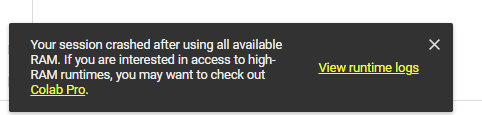

In [ ]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [ ]:
grid_predictions = grid_search.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

#<b>LOGISTIC REGRESSION</b>

In [ ]:
l=df
l.tail()

,www_likes,mobile_likes,likes,friend_count,tenure,gender
98998,491,3505,3996,2118,541.0,0
98999,2,4399,4401,1968,21.0,0
99000,0,11959,11959,2002,111.0,0
99001,0,4506,4506,2560,416.0,0
99002,0,9410,9410,2049,397.0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( l, np.ravel(l.gender),test_size = 0.40)

In [ ]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Using the standard scaler and PCA
std_slc = StandardScaler()
pca = decomposition.PCA()
logistic_Reg = linear_model.LogisticRegression()

In [ ]:
lg=logistic_Reg.fit(X_train, y_train)
predictions = lg.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16093
           1       1.00      1.00      1.00     23438

    accuracy                           1.00     39531
   macro avg       1.00      1.00      1.00     39531
weighted avg       1.00      1.00      1.00     39531



In [ ]:
#Using the Pipeline for grid search
pipe = Pipeline(steps=[('std_slc's, std_lc),('pca', pca),('logistic_Reg', logistic_Reg)])

n_components = list(range(1,X_train.shape[1]+1,1))

C = np.logspace(-4, 4, 50)
penalty = ['l2']

#Creating a dictionary to set different parameters for different modules
parameters = dict(pca__n_components=n_components,logistic_Reg__C=C,logistic_Reg__penalty=penalty)

In [ ]:
#Building the model and printing the result
from sklearn.model_selection import GridSearchCV
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)


print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

Best Penalty: l2
Best C: 0.009102981779915217
Best Number Of Components: 5

LogisticRegression(C=0.009102981779915217, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Time Complexity:- 5m.8sec

In [ ]:
grid_predictions = clf_GS.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16081
           1       1.00      1.00      1.00     23450

    accuracy                           1.00     39531
   macro avg       1.00      1.00      1.00     39531
weighted avg       1.00      1.00      1.00     39531



<b>The model is giving me 100% Accuracy for the model</b>

#<b>INFERENCE<BR>


<H2>The SVM is taking lot of time, while tuning the parameter, while without tuning, its prediction accuracy is very low. <br>
The ANN is showing the error of high RAM usage, so it is not advisible for the larger data set. And it requires the Data standardization before building the model.<br>
The logistic regression is the best binary classification model. Even while tuning the parameter the time complexity took by this model for training the data is less compare to the other models. Therefore, for my analysis Logistic regression is good for prediction </h2>